##Step 1: Heart Attack data Exploratory anlalysis: 
Exploratory data analysis, along with data preperation/preprocessing for classification predictive model development for heart attack in next step (step 2)

In [ ]:
## Import Libraries/Modeules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Loading the dataset from drive

df = pd.read_csv('drive/MyDrive/Datasets/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dataset Description:
Age : Age of the patient

Sex : Sex of the patient
(0 = male, 1 = female)

exang: exercise induced angina (1 = yes; 0 = no)


cp : Chest Pain type chest pain type;/
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results;/
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

oldpeak: Previous peak,ST depression induced by exercise relative to rest.

thal: thalassemia.

slp: 1-upsloping, 2-flat, 3-downsloping, The slope of the peak exercise ST segment

caa: number of major vessels (0-3)

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
print(df.shape)
print(df.info())
print('Missing values in dataset: ',df.isnull().sum().any())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
Missing values in dataset:  False


### Feature Distribution (all columns/attributes)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

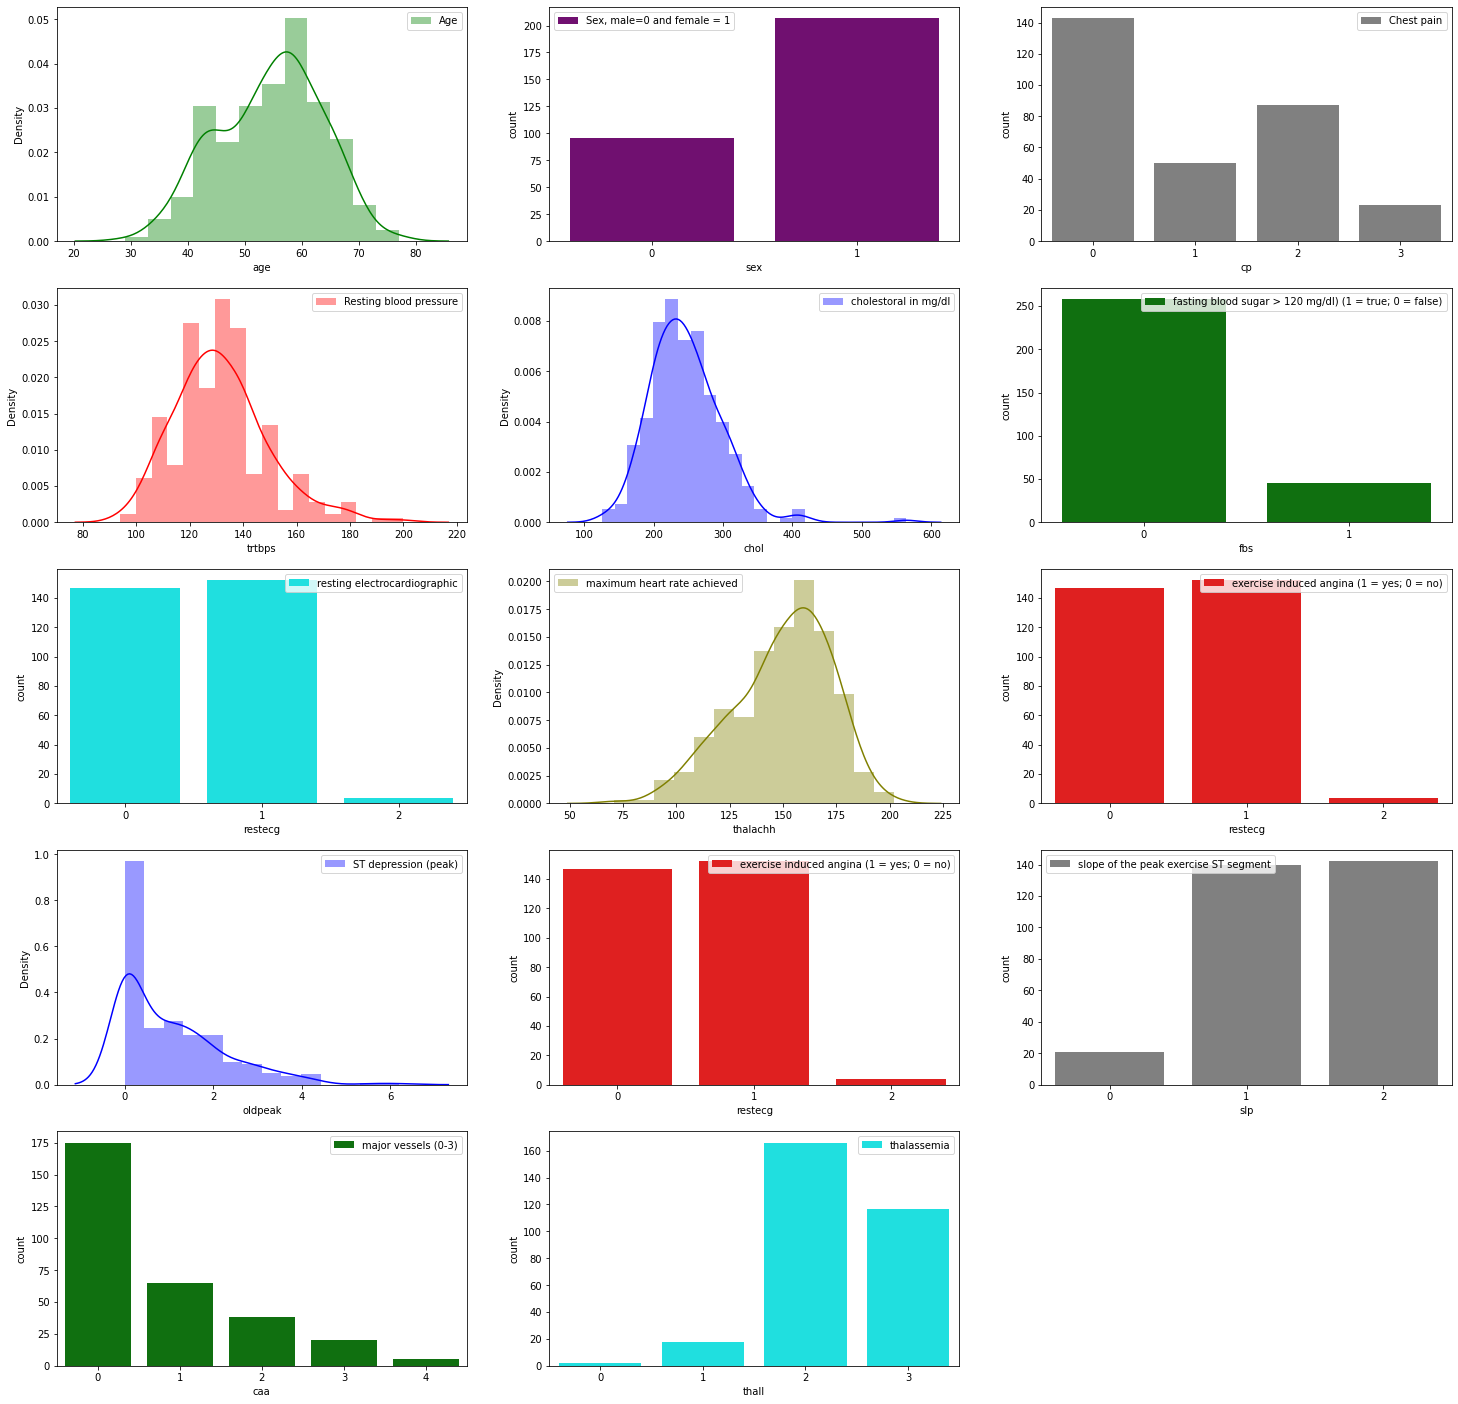

In [ ]:
fig=plt.figure(figsize=(25, 25))
##Age
fig = plt.subplot(531)
sns.distplot(df['age'], kde= True, color = 'green', label = 'Age')
plt.legend()
#Sex
fig = plt.subplot(532)
sns.countplot(df['sex'], color = 'purple',label = 'Sex, male=0 and female = 1')
plt.legend()
#cp
fig = plt.subplot(533)
sns.countplot(df['cp'],color = 'grey',label = 'Chest pain')
plt.legend()
#trtbps
fig = plt.subplot(534)
sns.distplot(df['trtbps'],kde = True, color = 'red', label = 'Resting blood pressure')
plt.legend()
#chol
fig = plt.subplot(535)
sns.distplot(df['chol'],kde = True, color = 'blue', label = 'cholestoral in mg/dl')
plt.legend()
#fbs
fig = plt.subplot(536)
sns.countplot(df['fbs'],color = 'green',label = 'fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend()
#restecg
fig = plt.subplot(537)
sns.countplot(df['restecg'],color = 'cyan',label = 'resting electrocardiographic')
plt.legend()
#	thalachh
fig = plt.subplot(538)
sns.distplot(df['thalachh'],kde = True, color = 'olive', label = 'maximum heart rate achieved')
plt.legend()
#exng
fig = plt.subplot(539)
sns.countplot(df['restecg'],color = 'red',label = 'exercise induced angina (1 = yes; 0 = no)')
plt.legend()
#oldpeak
fig = plt.subplot(5,3,10)
sns.distplot(df['oldpeak'],kde = True, color = 'blue', label = 'ST depression (peak)')
plt.legend()
#exng
fig = plt.subplot(5,3,11)
sns.countplot(df['restecg'],color = 'red',label = 'exercise induced angina (1 = yes; 0 = no)')
plt.legend()
#slp
fig = plt.subplot(5,3,12)
sns.countplot(df['slp'], color = 'grey', label = 'slope of the peak exercise ST segment')
plt.legend()
#caa
fig = plt.subplot(5,3,13)
sns.countplot(df['caa'],color = 'green',label = 'major vessels (0-3)')
plt.legend()
#thall
fig = plt.subplot(5,3,14)
sns.countplot(df['thall'],color = 'cyan',label = 'thalassemia')
plt.legend()
plt.show()

**TakeAway:**
Most of the people are having (in dataset):

1. Resting Blood pressure in between: 120-150 in mm hg
2. Cholesterol in between 150 - 300 mg/dl
3. Maximum Heart rate between 125 - 180.

### Heart disease over Distributed attributes

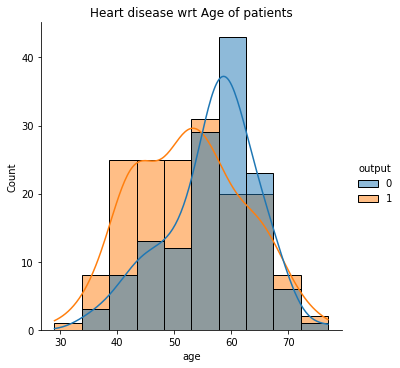

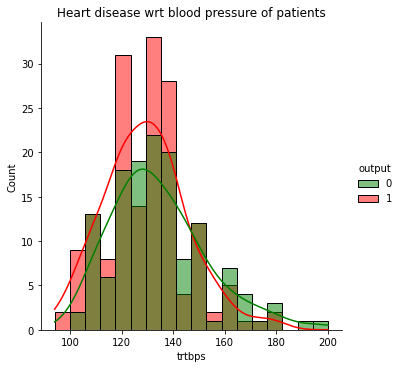

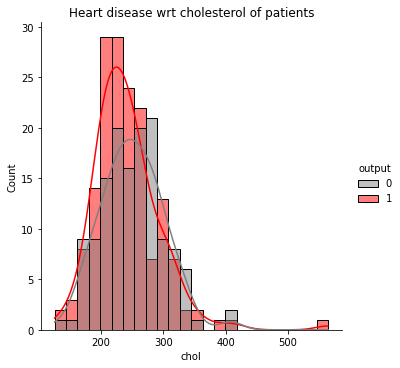

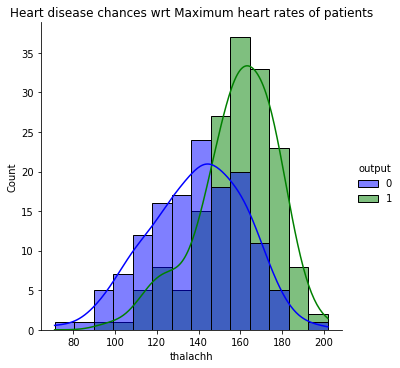

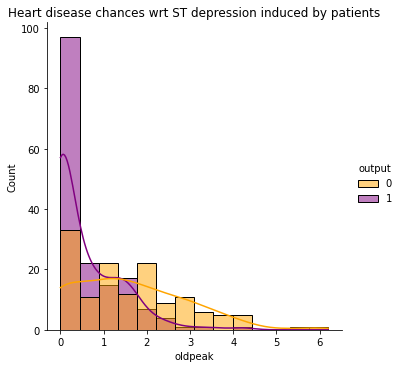

In [ ]:
## Age
sns.displot(x = df['age'], hue = df['output'], bins = 10, kde = True)
plt.title('Heart disease wrt Age of patients')
plt.show()
## Resting blood pressure
sns.displot(x = df['trtbps'], hue = df['output'], kde = True, palette= ['green', 'red'])
plt.title('Heart disease wrt blood pressure of patients')
plt.show()
## Cholesterol
sns.displot(x= df['chol'], hue = df['output'], kde = True, palette= ['grey', 'red'])
plt.title('Heart disease wrt cholesterol of patients')
plt.show()
## Maximum heart rate achieved
sns.displot(x = df['thalachh'], hue = df['output'], kde = True, palette= ['blue', 'green'])
plt.title('Heart disease chances wrt Maximum heart rates of patients')
plt.show()
##ST depression induced by exercise
sns.displot(x = df['oldpeak'], hue = df['output'], kde = True, palette= ['orange', 'purple'])
plt.title('Heart disease chances wrt ST depression induced by patients')
plt.show()

**TakeAway:** 

1. Patients getting heart attack are most likely in age between 45-60 Age group.
2. Patients having Resting blood pressure in range of 120-150 in mm hg are have more chances of getting heart attacks.
3. patients have higher chnaces of getting heart attack, that have cholesterol in range of 190 - 300 mg/dl.
4. patients have higher chnaces of getting heart attack then usual other patients, that have their maximum heart rate in range of 140-190. (if calculated in more precisely, then patients who have heart rate in range of 150-180)
5. If the measure of ST depression induced by exercise relative to rest in patients is in between 0-1 (most likely 0-0.5) then chances of that patinets having heart attack is high than others.



### Heart Disease over Other Attributes

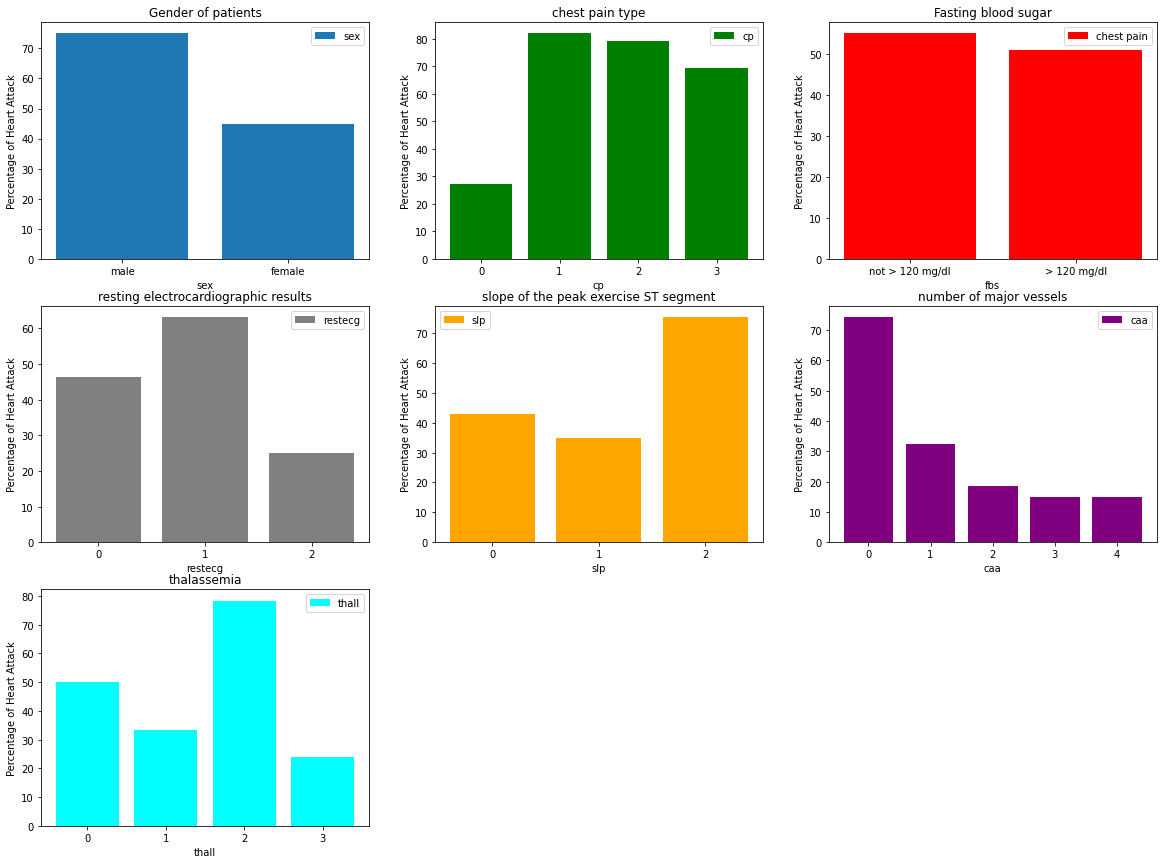

In [ ]:
fig=plt.figure(figsize=(20, 20))
# Sex
fig = plt.subplot(431)
a = [(100)*df[df['sex']==0]['output'].sum()/len(df[df['sex']==0]['output']),
     (100)*df[df['sex']==1]['output'].sum()/len(df[df['sex']==1]['output'])]
x=["male","female"]
plt.bar(x,a,label= 'sex' )
plt.xlabel('sex')
plt.ylabel('Percentage of Heart Attack')
plt.title('Gender of patients')
plt.legend()
# cp
fig = plt.subplot(432)
a = [(100)*df[df['cp']==0]['output'].sum()/len(df[df['cp']==0]['output']),
     (100)*df[df['cp']==1]['output'].sum()/len(df[df['cp']==1]['output']),
     (100)*df[df['cp']==2]['output'].sum()/len(df[df['cp']==2]['output']),
     (100)*df[df['cp']==3]['output'].sum()/len(df[df['cp']==3]['output'])]
x=['0','1','2','3']
plt.bar(x,a,label= 'cp', color = 'green')
plt.xlabel('cp')
plt.ylabel('Percentage of Heart Attack')
plt.title('chest pain type')
plt.legend()
# fbs
fig = plt.subplot(433)
a = [(100)*df[df['fbs']==0]['output'].sum()/len(df[df['fbs']==0]['output']),
     (100)*df[df['fbs']==1]['output'].sum()/len(df[df['fbs']==1]['output'])]
x=['not > 120 mg/dl', '> 120 mg/dl']
plt.bar(x,a,label= 'chest pain',color = 'red' )
plt.xlabel('fbs')
plt.ylabel('Percentage of Heart Attack')
plt.title('Fasting blood sugar')
plt.legend()
# restecg
fig = plt.subplot(434)
a = [(100)*df[df['restecg']==0]['output'].sum()/len(df[df['restecg']==0]['output']),
     (100)*df[df['restecg']==1]['output'].sum()/len(df[df['restecg']==1]['output']),
     (100)*df[df['restecg']==2]['output'].sum()/len(df[df['restecg']==2]['output'])]
x=['0','1','2']
plt.bar(x,a,label= 'restecg', color = 'grey')
plt.xlabel('restecg')
plt.ylabel('Percentage of Heart Attack')
plt.title('resting electrocardiographic results')
plt.legend()
# slp
fig = plt.subplot(435)
a = [(100)*df[df['slp']==0]['output'].sum()/len(df[df['slp']==0]['output']),
     (100)*df[df['slp']==1]['output'].sum()/len(df[df['slp']==1]['output']),
     (100)*df[df['slp']==2]['output'].sum()/len(df[df['slp']==2]['output'])]
x=['0','1','2']
plt.bar(x,a,label= 'slp', color = 'orange')
plt.xlabel('slp')
plt.ylabel('Percentage of Heart Attack')
plt.title('slope of the peak exercise ST segment')
plt.legend()
# caa
fig = plt.subplot(436)
a = [(100)*df[df['caa']==0]['output'].sum()/len(df[df['caa']==0]['output']),
     (100)*df[df['caa']==1]['output'].sum()/len(df[df['caa']==1]['output']),
     (100)*df[df['caa']==2]['output'].sum()/len(df[df['caa']==2]['output']),
     (100)*df[df['caa']==3]['output'].sum()/len(df[df['caa']==3]['output']),
     (100)*df[df['caa']==3]['output'].sum()/len(df[df['caa']==3]['output'])]
x=['0','1','2','3','4']
plt.bar(x,a,label= 'caa', color = 'purple')
plt.xlabel('caa')
plt.ylabel('Percentage of Heart Attack')
plt.title('number of major vessels')
plt.legend()
# thall
fig = plt.subplot(437)
a = [(100)*df[df['thall']==0]['output'].sum()/len(df[df['thall']==0]['output']),
     (100)*df[df['thall']==1]['output'].sum()/len(df[df['thall']==1]['output']),
     (100)*df[df['thall']==2]['output'].sum()/len(df[df['thall']==2]['output']),
     (100)*df[df['thall']==3]['output'].sum()/len(df[df['thall']==3]['output'])]
x=['0','1','2','3']
plt.bar(x,a,label= 'thall', color = 'cyan')
plt.xlabel('thall')
plt.ylabel('Percentage of Heart Attack')
plt.title('thalassemia')
plt.legend()
plt.show()

**TakeAway:**

1. Most of the Male patients (around 75%) are more likely to have heart attack than feamle.
2. People who are having chest pain of type as atypical angina, non-anginal pain, asymptomatic chest pain are more likely to have heart attack.
3. People (around 55%) having fasting blood sugar rate around > 120 mg/dl are more likely to have heart attack, but if we compare then patients who may or may not have blood sugar is independent of having heart attack.
4. Almost 60% of people who have resting electrocardiographic results, i.e having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) are more likely to get heart attack.
5. Almost 70% Patinets who are having flat slope of the peak exercise ST segment are more likely to have heart attack then people with unslopping or downslopping value of eak exercise ST segment.
6. People having 0 major number of vessels are have chances of getting heart attack.

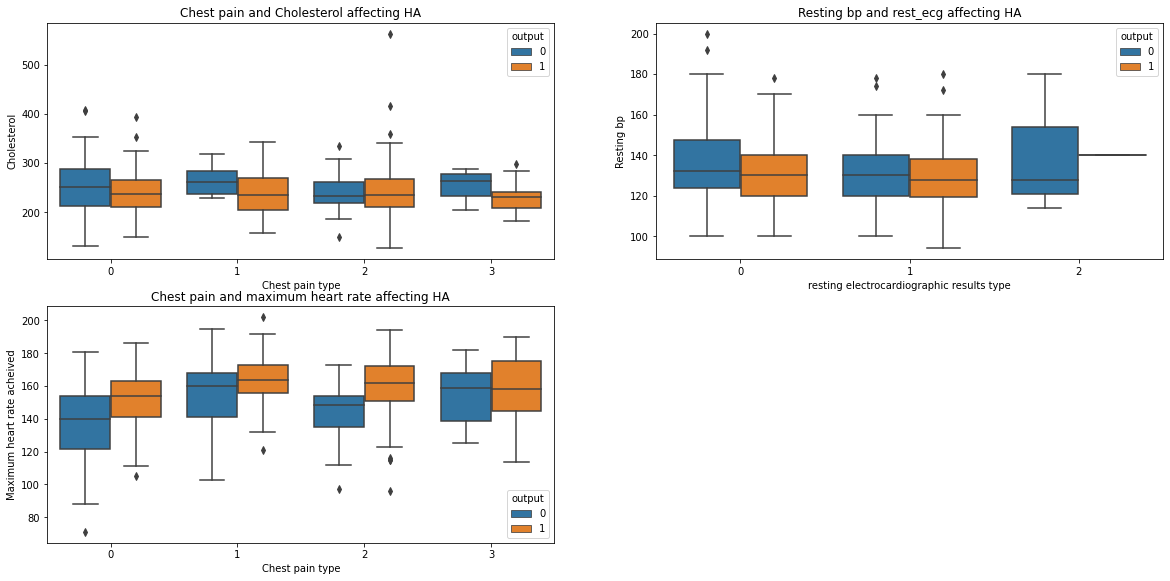

In [ ]:
fig=plt.figure(figsize=(20, 20))
fig = plt.subplot(421)
sns.boxplot(x = 'cp', y= 'chol', hue = 'output', data = df)
plt.xlabel('Chest pain type')
plt.ylabel('Cholesterol')
plt.title('Chest pain and Cholesterol affecting HA')
fig = plt.subplot(422)
sns.boxplot(x= 'restecg', y = 'trtbps', hue = 'output', data = df)
plt.xlabel('resting electrocardiographic results type')
plt.ylabel('Resting bp')
plt.title('Resting bp and rest_ecg affecting HA')
fig = plt.subplot(423)
sns.boxplot(x = 'cp', y= 'thalachh', hue = 'output', data = df)
plt.xlabel('Chest pain type')
plt.ylabel('Maximum heart rate acheived')
plt.title('Chest pain and maximum heart rate affecting HA')
plt.show()

**TakeAway**: Higher heart attack chances in people having:
1. 200 - 280 mg/ dl cholesterol with 0, 1, 2 type of chest pain mentioned. (in description of dataset)
2. Resting bp of 120 - 140 mg HH and resting electrocardiographic results type 0, 1.
3. Maximum heart rate around 140 - 180 and chest pain of type 3rd (as mentioned in description of dataset.)